In [27]:
import numpy as np
import brainpy as bp
import brainpy.math as bm
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"  # specify which GPU(s) to be used
bm.disable_gpu_memory_preallocation()
bm.set_platform('cpu')
import torch

from sbi.inference import (
    likelihood_estimator_based_potential,
    SNLE,
    prepare_for_sbi,
    simulate_for_sbi,
    VIPosterior,
)

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from HH_helper_bp import *

# For SNPE：posterior_nn(). SNLE: likelihood_nn(). For SNRE: classifier_nn(), 
# sbi
from sbi.inference import SNPE, SNRE, SNLE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn, likelihood_nn, classifier_nn
from sbi import utils as utils
from sbi import analysis as analysis
from scipy.stats import kurtosis as kurt
from sbi.utils.user_input_checks import process_pytorch_prior, process_simulator

In [28]:
prior_min = [5. ,   5.,   5., 5.,   5.]
prior_max = [25.0,  25.0, 25., 25., 25.,]

draw_list = [[lower,higher] for lower,higher in zip(prior_min,prior_max)]

In [29]:
loaded_data = np.load('data/Muscle_Net_4.npz', allow_pickle=True)
samples = loaded_data['samples']
true_params = loaded_data['true_params']
true_data = loaded_data['true_data']
xo = loaded_data['xo']

In [37]:
true_params[:,1] = 19
true_params[:,-1] = 10

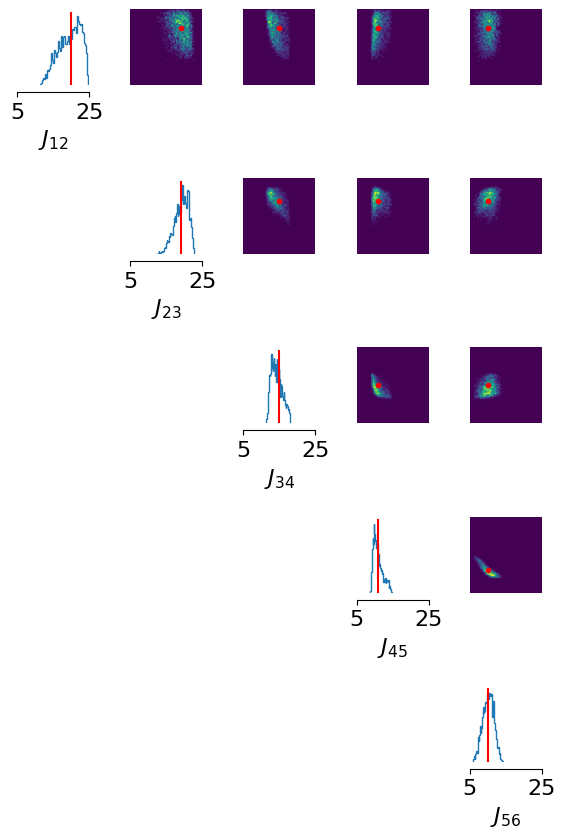

In [38]:
plt_style = {
    'font.size' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'axes.labelsize' : 16,
    'axes.titlesize' : 16,
    # 'font.family': "Times New Roman"
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val
    
labels_params = [r'$J_{12}$', r'$J_{23}$', r'$J_{34}$', r'$J_{45}$', r'$J_{56}$']
analysis.pairplot(samples,
                        limits=draw_list,
                        ticks= draw_list,
                        figsize=(6, 9),
                        points=true_params, labels=labels_params,
                        points_offdiag={'markersize': 6},
                        points_colors=['r'])
plt.tight_layout()
plt.savefig('Figure/Muscle_Net_posterior_gap.svg', dpi=300)
plt.savefig('Figure/Muscle_Net_posterior_gap.png', dpi=300)
plt.savefig('Figure/Muscle_Net_posterior_gap.pdf', dpi=300)